# Implementation of VFI and PFI Algorithms
Kopyl Roman, 182

## The task is provided below. 
<img src="Task.png">

# Parameter Setting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")

In [2]:
y = np.array([1.5, 1.3, 1.2])

P = np.array([[.5, .25, .25],
             [.25, .5, .25],
             [.25, .25, .5]])

N_distr = P.shape[0]

gamma = 2

In [3]:
W_start = 100 * y.max()
start_number = 450
W = np.linspace(W_start / start_number, W_start, start_number, endpoint=True)

# **Value Function Iteration**

## $\beta$ = 0.95

In [ ]:
beta = .95
R = 1 / beta

In [42]:
reward = np.zeros((start_number, start_number, N_distr))
value = np.zeros((N_distr, start_number))
value_lag = np.zeros((N_distr, start_number))
I = np.zeros((N_distr, start_number))

iteration = 0
dif = 100
dif_tol = .1
iter_number = 200

INF = 1e32

In [43]:
%%time
while dif >= dif_tol and iteration < iter_number:
    for shock in range(N_distr):
        for k_start in range(start_number):
            for k_choice in range(start_number):
                cons = y[shock] * W[k_start] - W[k_choice] / R
                if cons <= 0:
                    reward[k_start, k_choice, shock] = -INF
                else:
                    E_value = P[shock, :] @ value[:, k_choice]
                    reward[k_start, k_choice, shock] = cons ** (1 - gamma) / (1 - gamma) + beta * E_value    
    for shock in range(N_distr):
        value[shock,:] = np.max(reward[:,:,shock], 1)
        I[shock,:] = np.argmax(reward[:,:,shock], 1)
        
    dif = np.linalg.norm(value - value_lag)
    value_lag = deepcopy(value)
    iteration += 1

Wall time: 3min 9s


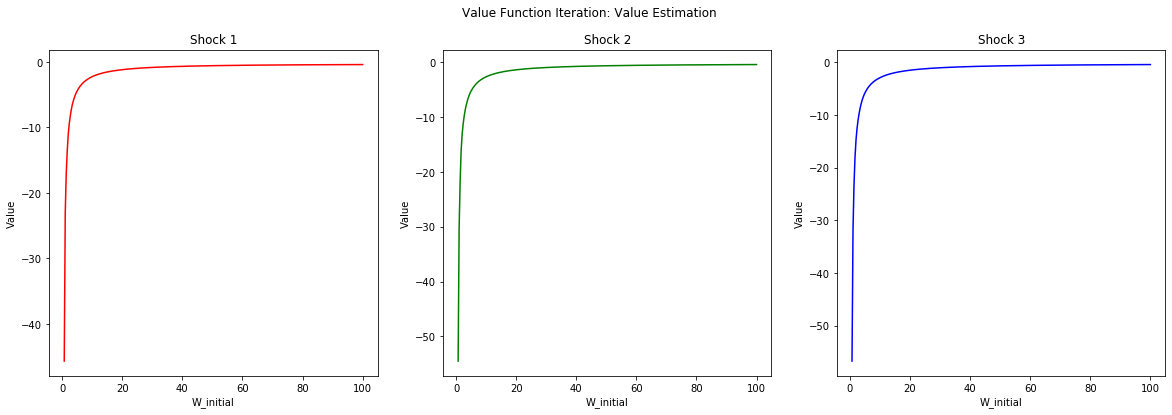

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));
plt.suptitle('Value Function Iteration: Value Estimation');

axs[0].plot(W[W <= 100][1:], value[0,:][W <= 100][1:], 'r');
axs[0].set_title('Shock 1');
axs[1].plot(W[W <= 100][1:], value[1,:][W <= 100][1:], 'g');
axs[1].set_title('Shock 2');
axs[2].plot(W[W <= 100][1:], value[2,:][W <= 100][1:], 'b');
axs[2].set_title('Shock 3');


for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='Value')

plt.show();

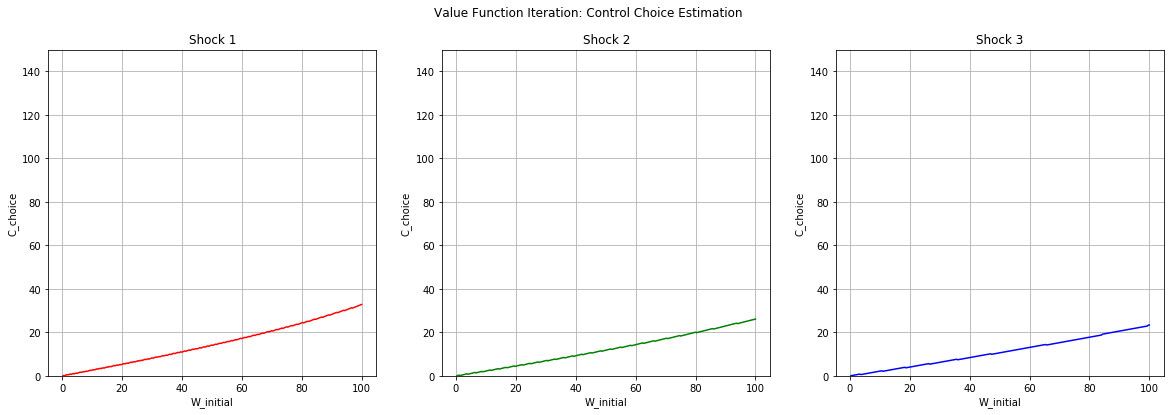

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: Control Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], y[0] * W[W <= 100] - W[I[0,:]][W <= 100] / R, 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], y[1] * W[W <= 100] - W[I[1,:]][W <= 100] / R, 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], y[2] * W[W <= 100] - W[I[2,:]][W <= 100] / R, 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='C_choice')

plt.show();

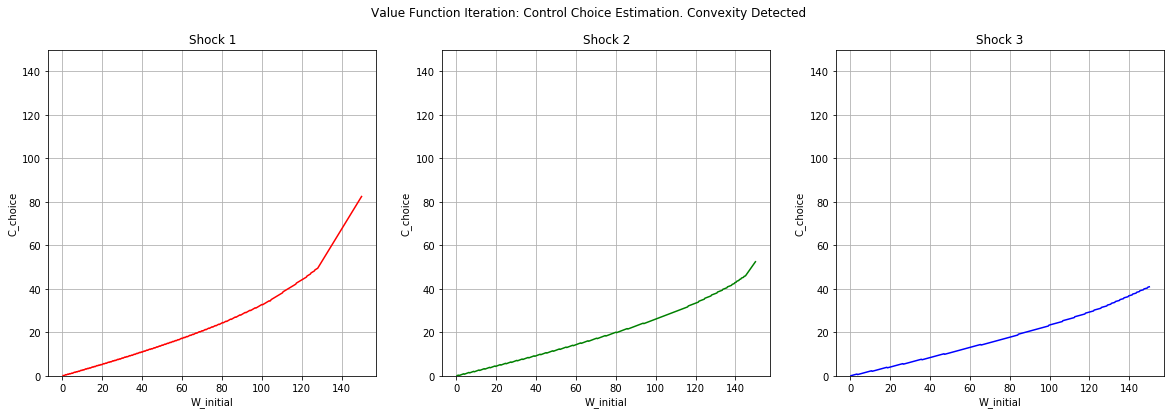

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: Control Choice Estimation. Convexity Detected');

I = I.astype('int64')

axs[0].plot(W, y[0] * W - W[I[0,:]] / R, 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W, y[1] * W - W[I[1,:]] / R, 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W, y[2] * W - W[I[2,:]] / R, 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='C_choice')

plt.show();

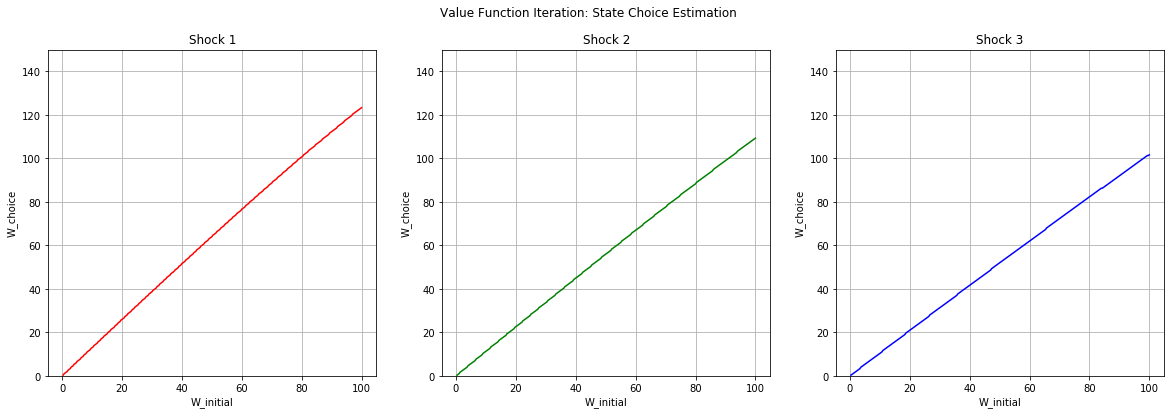

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: State Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], W[I[0,:]][W <= 100], 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], W[I[1,:]][W <= 100], 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], W[I[2,:]][W <= 100], 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='W_choice')

plt.show();

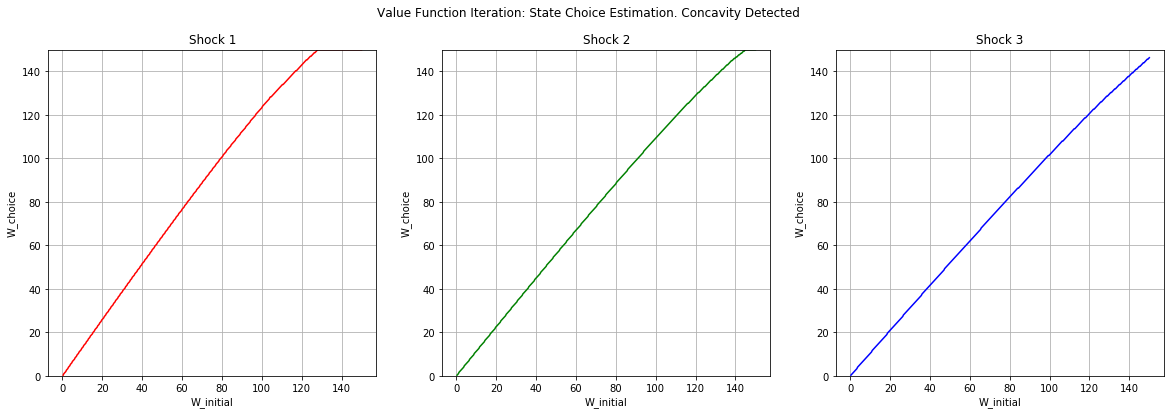

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: State Choice Estimation. Concavity Detected');

I = I.astype('int64')

axs[0].plot(W, W[I[0,:]], 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W, W[I[1,:]], 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W, W[I[2,:]], 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='W_choice')

plt.show();

## $\beta$ = 0.9

In [ ]:
beta = 0.9
R = 1 / beta

In [13]:
reward = np.zeros((start_number, start_number, N_distr))
value = np.zeros((N_distr, start_number))
value_lag = np.zeros((N_distr, start_number))
I = np.zeros((N_distr, start_number))

iteration = 0
dif = 100
dif_tol = .1
iter_number = 200

INF = 1e32

In [14]:
%%time
while dif >= dif_tol and iteration < iter_number:
    for shock in range(N_distr):
        for k_start in range(start_number):
            for k_choice in range(start_number):
                cons = y[shock] * W[k_start] - W[k_choice] / R
                if cons <= 0:
                    reward[k_start, k_choice, shock] = -INF
                else:
                    E_value = P[shock, :] @ value[:, k_choice]
                    reward[k_start, k_choice, shock] = cons ** (1 - gamma) / (1 - gamma) + beta * E_value    
    for shock in range(N_distr):
        value[shock,:] = np.max(reward[:,:,shock], 1)
        I[shock,:] = np.argmax(reward[:,:,shock], 1)
        
    dif = np.linalg.norm(value - value_lag)
    value_lag = deepcopy(value)
    iteration += 1

Wall time: 1min 25s


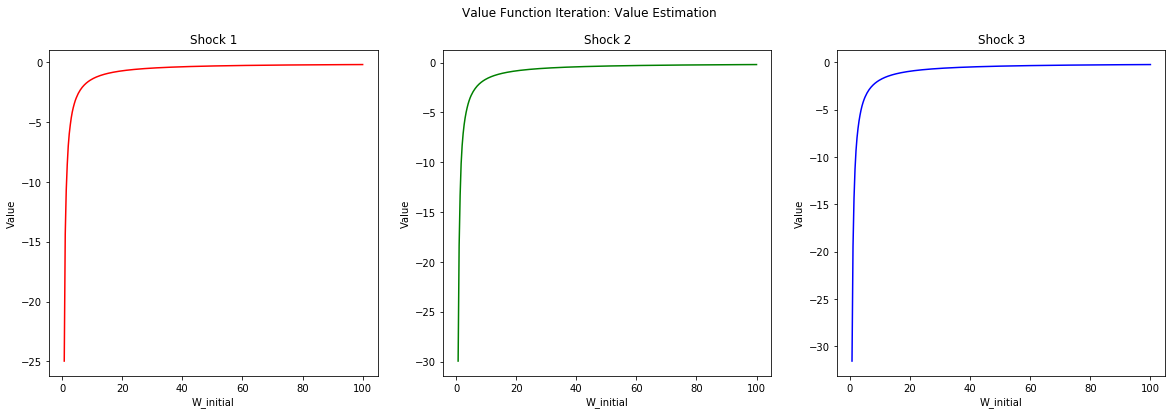

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));
plt.suptitle('Value Function Iteration: Value Estimation');

axs[0].plot(W[W <= 100][1:], value[0,:][W <= 100][1:], 'r');
axs[0].set_title('Shock 1');
axs[1].plot(W[W <= 100][1:], value[1,:][W <= 100][1:], 'g');
axs[1].set_title('Shock 2');
axs[2].plot(W[W <= 100][1:], value[2,:][W <= 100][1:], 'b');
axs[2].set_title('Shock 3');


for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='Value')

plt.show();

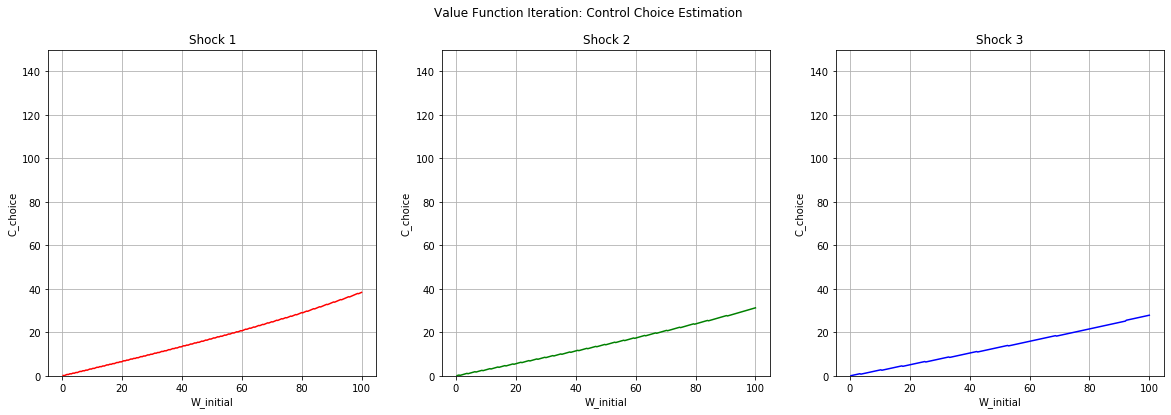

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: Control Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], y[0] * W[W <= 100] - W[I[0,:]][W <= 100] / R, 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], y[1] * W[W <= 100] - W[I[1,:]][W <= 100] / R, 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], y[2] * W[W <= 100] - W[I[2,:]][W <= 100] / R, 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='C_choice')

plt.show();

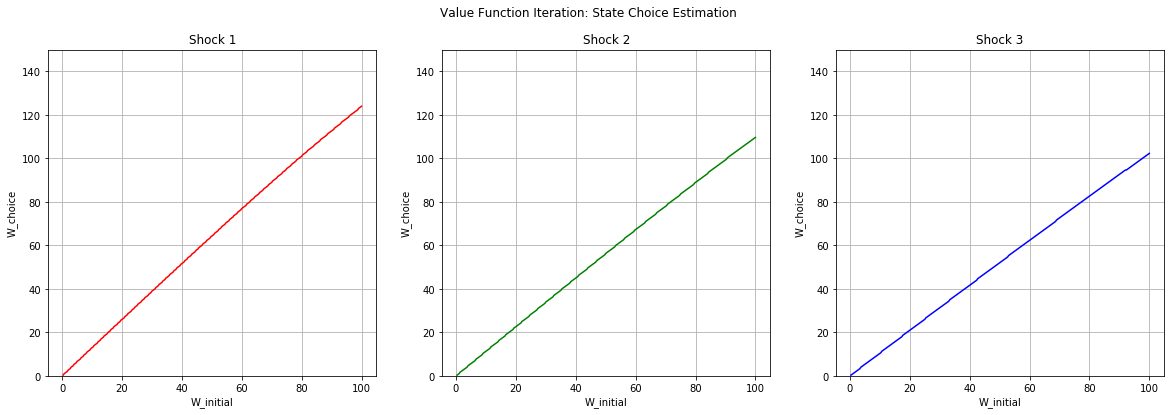

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: State Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], W[I[0,:]][W <= 100], 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], W[I[1,:]][W <= 100], 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], W[I[2,:]][W <= 100], 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='W_choice')

plt.show();

## $\beta$ = 0.99

In [ ]:
beta = 0.99
R = 1 / beta

In [19]:
reward = np.zeros((start_number, start_number, N_distr))
value = np.zeros((N_distr, start_number))
value_lag = np.zeros((N_distr, start_number))
I = np.zeros((N_distr, start_number))

iteration = 0
dif = 100
dif_tol = .1
iter_number = 200

INF = 1e32

In [20]:
%%time
while dif >= dif_tol and iteration < iter_number:
    for shock in range(N_distr):
        for k_start in range(start_number):
            for k_choice in range(start_number):
                cons = y[shock] * W[k_start] - W[k_choice] / R
                if cons <= 0:
                    reward[k_start, k_choice, shock] = -INF
                else:
                    E_value = P[shock, :] @ value[:, k_choice]
                    reward[k_start, k_choice, shock] = cons ** (1 - gamma) / (1 - gamma) + beta * E_value    
    for shock in range(N_distr):
        value[shock,:] = np.max(reward[:,:,shock], 1)
        I[shock,:] = np.argmax(reward[:,:,shock], 1)
        
    dif = np.linalg.norm(value - value_lag)
    value_lag = deepcopy(value)
    iteration += 1

Wall time: 5min 33s


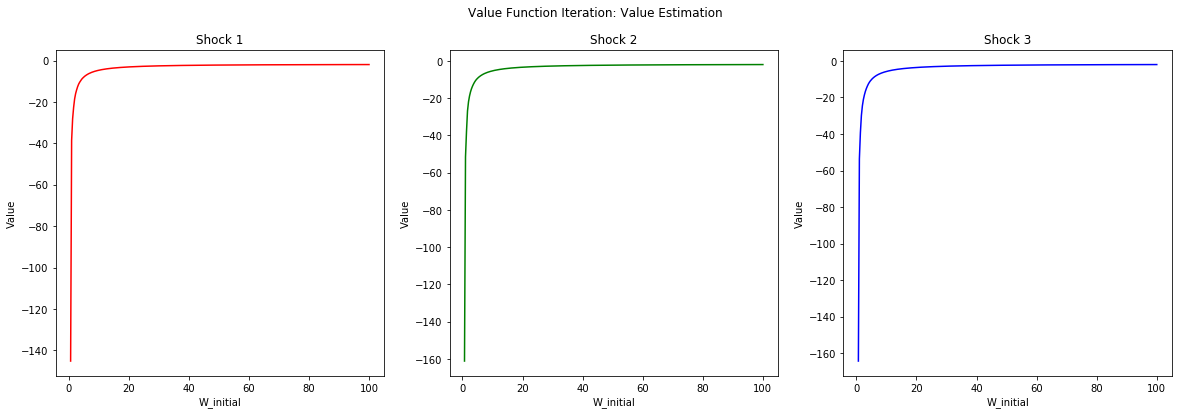

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));
plt.suptitle('Value Function Iteration: Value Estimation');

axs[0].plot(W[W <= 100][1:], value[0,:][W <= 100][1:], 'r');
axs[0].set_title('Shock 1');
axs[1].plot(W[W <= 100][1:], value[1,:][W <= 100][1:], 'g');
axs[1].set_title('Shock 2');
axs[2].plot(W[W <= 100][1:], value[2,:][W <= 100][1:], 'b');
axs[2].set_title('Shock 3');


for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='Value')

plt.show();

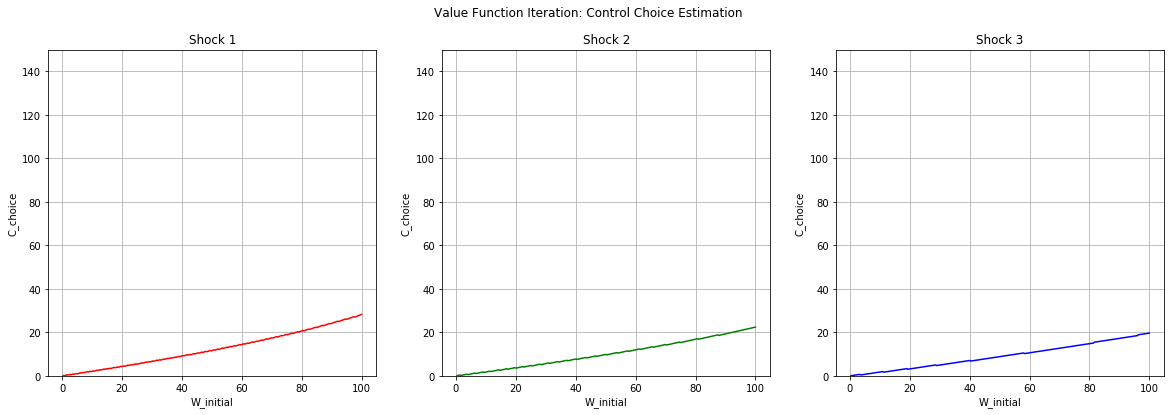

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: Control Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], y[0] * W[W <= 100] - W[I[0,:]][W <= 100] / R, 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], y[1] * W[W <= 100] - W[I[1,:]][W <= 100] / R, 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], y[2] * W[W <= 100] - W[I[2,:]][W <= 100] / R, 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='C_choice')

plt.show();

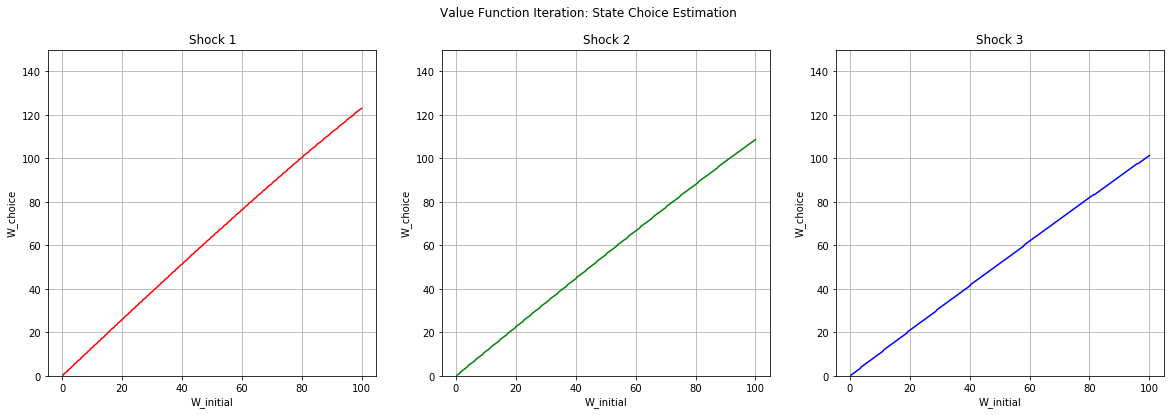

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: State Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], W[I[0,:]][W <= 100], 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], W[I[1,:]][W <= 100], 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], W[I[2,:]][W <= 100], 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='W_choice')

plt.show();

Заметим, что при $\beta = 0.9$ цикл сходится быстрее, чем при $\beta = 0.95$, а при $\beta = 0.99$, наоборот, тратит больше времени на итерации. Давайте попробуем это доказать.

Предположим, что наш Value Function Iteration основан на теореме Банаха (в лекциях она упоминалась как Contraction Mapping Theorem). Тогда рассмотрим последовательность $V$, где $V_{n+1} = T(V_n), V_0 = 0$, где $V$ - вектор оптимальных значений переменной <i>value</i> для каждого начального капитала в нашем дискретизированном пространстве.

Тогда для любых элементов ${x, y}$ из этой последовательности выполняется следующее условие (условие сжатия) для выполнение теоремы Банаха. Существует такая $\alpha \in (0, 1)$, что для любой такой пары:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/49edaa92b2443a1de92fa7402adc4e560c6ba5e1">

Покажем, что $\alpha=\beta$.

Исходя из теоремы Банаха мы знаем, что существует такая точка $V^*$, что $T(V^*)=V^*$. Кроме того, логично предположить, что существует такое $V^N \neq V^*$, что $T(V^N)=V^*$. Тогда запишем некоторые уравнения на них. Пусть также $V_{n+1} = V^*, V_n = V^N$. Тогда:

\begin{equation*}
 \begin{cases}
   V_{n+1} = u(с_{n+1}) + \beta \cdot E\{V_{n+1}(W'_{n+1})\}
   \\ 
   \\
   V_{n+1} = u(с_{n+1}) + \beta \cdot E\{V_n(W'_{n+1})\},
 \end{cases}
\end{equation*}

где $c_n$ - набор оптимальных потреблений, $W'_n$ - выбор оптимального будущего капитала на n-й итерации.

Теперь отметим, что исходя из наших результатов на каждой итерации $W_n \le W'_n$, где $W_n$ - вектор начальных запасов пирога на каждой итерации. Очевидно, что значения этого вектора не зависят от $n$. Применим тогда следующее неравенство:

$$ T(W + k)(s) \le T(W)(s) + \beta \cdot k $$

Тогда получаем, что:

\begin{equation*}
 \begin{cases}
   V_{n+1} \le u(с_{n+1}) + \beta \cdot E\{V_{n+1}(W_{n+1})\} + \beta^2 \cdot E\{\Delta W\}
   \\ 
   \\
   V_{n+1} \le u(с_{n+1}) + \beta \cdot E\{V_n(W_{n+1})\} + \beta^2 \cdot E\{\Delta W\}
 \end{cases}
 \hspace{1 mm}, где \hspace{1 mm} \Delta W = W'_{n+1} - W_{n+1}.
\end{equation*}

Тогда вычтем нижнее неравенство из верхнего и получим:

$$ 0 \le \beta \cdot E\{V_{n+1}(W_{n+1}) - V_n(W_{n+1})\} = \beta \cdot E\{V_{n+1} - V_n\} $$

Применим к неравенству оператор расстояния, считающий норму пространства по матожиданию. В результате, мы получаем:

$$ 0 \le  \beta \cdot ||V_{n+1} - V_n|| $$

Рассмотрим теперь наше изначальное условие из теоремы Банаха для $V_{n+1}$ и $V_n$. Давайте поймем, что $T(V_{n+1}) = V_{n+1}$ и $T(V_n) = V_{n+1}$. Тогда:

$$ ||T(V_{n+1}) - T(V_n)|| \le \alpha \cdot ||V_{n+1} - V_n|| \Leftrightarrow || V_{n+1} - V_{n+1} || \le \alpha \cdot ||V_{n+1} - V_n|| \Leftrightarrow 0 \le \alpha \cdot ||V_{n+1} - V_n|| $$

Заметим, что верхнее неравенство получено из тех же условий и процессов, что и нижнее. Более того, последнее должно являеться следствием предыдущего, так как мы выражаем норму разности двух преобразованных под отражением Т элементов через норму разности этих элементов. Это означает, что они аналогичны и должны быть равны. Тогда $\alpha = \beta$.

Теперь рассмотрим два соседних элемента последовательности $V_K$ и $V_{K+1}$, такие что $T(V_{K}) = V_{K+1}$ и $T(V_{K+1}) = V_{K+2}$. Запишем для них это условие сжатия. 

$$ ||V_{K+2} - V_{K+1}|| \le \beta \cdot ||V_{K+1} - V_{K}|| $$

Заметим, что расстояние справа - это значение переменной <i>dif</i> после $K$-й итерации, а расстояние слева - после $K+1$-й итерации. Заметим, что чем больше $\beta$, тем больше может быть наш следующий <i>dif</i>, то есть, он, возможно, будет медленнее уменьшаться. Значит, он позже достигнет порога прекращения цикла. Поэтому при больших бетах цикл сходится дольше. $\blacksquare$

Собственно, идея заключается в том, что исходя из теоремы о сжатии, схорость схождения конкретно нашего алгоритма зависит линейно от $\beta$.

## $\beta$ = 1.1

In [4]:
beta = 1.1
R = 1 / beta

In [19]:
reward = np.zeros((start_number, start_number, N_distr))
value = np.zeros((N_distr, start_number))
value_lag = np.zeros((N_distr, start_number))
I = np.zeros((N_distr, start_number))

iteration = 0
dif = 100
dif_tol = .1
iter_number = 500

INF = 1e32

In [20]:
%%time

difs = []

while dif >= dif_tol and iteration < iter_number:
    for shock in range(N_distr):
        for k_start in range(start_number):
            for k_choice in range(start_number):
                cons = y[shock] * W[k_start] - W[k_choice] / R
                if cons <= 0:
                    reward[k_start, k_choice, shock] = -INF
                else:
                    E_value = P[shock, :] @ value[:, k_choice]
                    reward[k_start, k_choice, shock] = cons ** (1 - gamma) / (1 - gamma) + beta * E_value    
    for shock in range(N_distr):
        value[shock,:] = np.max(reward[:,:,shock], 1)
        I[shock,:] = np.argmax(reward[:,:,shock], 1)
        
    dif = np.linalg.norm(value - value_lag)
    value_lag = deepcopy(value)
    iteration += 1
    
    difs.append(dif)
        
if iteration == 500:
    print("Iteration Limit Exceeded")

Iteration Limit Exceeded
Wall time: 11min 57s


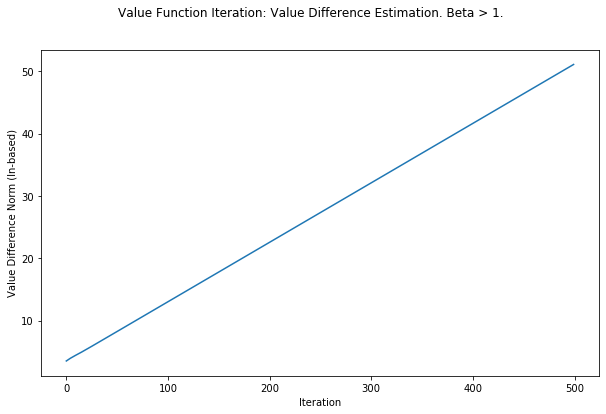

In [29]:
plt.figure(figsize=(10,6));
plt.suptitle('Value Function Iteration: Value Difference Estimation. Beta > 1.');

difs = np.array(difs)

plt.plot(np.log(difs));

plt.xlabel('Iteration');
plt.ylabel('Value Difference Norm (ln-based)');

plt.show();

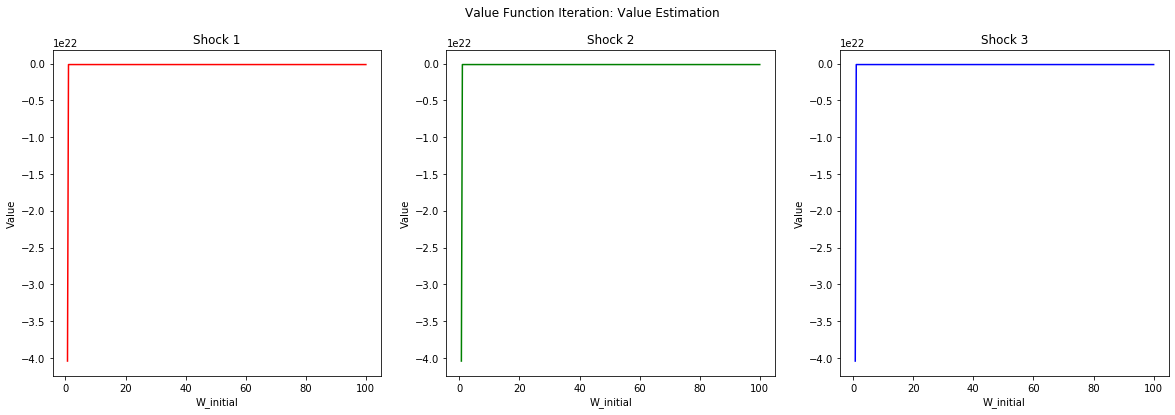

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));
plt.suptitle('Value Function Iteration: Value Estimation');

axs[0].plot(W[W <= 100][1:], value[0,:][W <= 100][1:], 'r');
axs[0].set_title('Shock 1');
axs[1].plot(W[W <= 100][1:], value[1,:][W <= 100][1:], 'g');
axs[1].set_title('Shock 2');
axs[2].plot(W[W <= 100][1:], value[2,:][W <= 100][1:], 'b');
axs[2].set_title('Shock 3');


for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='Value')

plt.show();

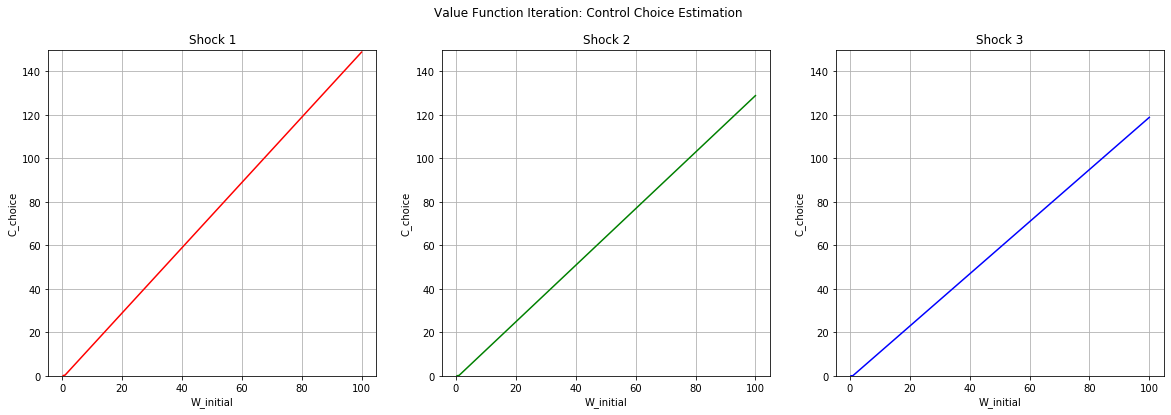

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: Control Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], y[0] * W[W <= 100] - W[I[0,:]][W <= 100] / R, 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], y[1] * W[W <= 100] - W[I[1,:]][W <= 100] / R, 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], y[2] * W[W <= 100] - W[I[2,:]][W <= 100] / R, 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='C_choice')

plt.show();

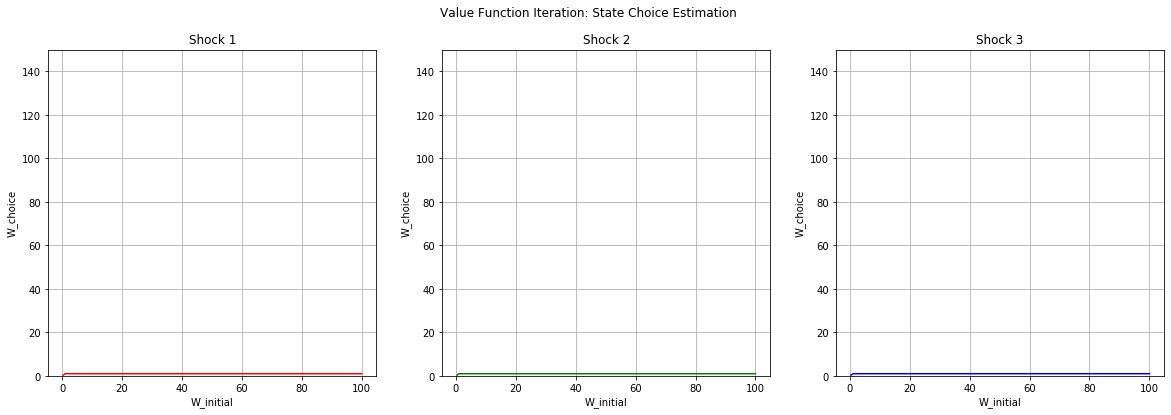

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));

plt.suptitle('Value Function Iteration: State Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], W[I[0,:]][W <= 100], 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], W[I[1,:]][W <= 100], 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], W[I[2,:]][W <= 100], 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();

for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='W_choice')

plt.show();

Как мы видим, $\beta = 1.1$ не смогла сойтись за 500 итераций, что почти наверно означает, что алгоритм расходится при такой бете. Заметим, что при такой $\beta$ не выолняется теорема о сжатии, так как коэффициент сжатия ($\beta$ в данном случае) не должен превышать единицу, поэтому тяжело делать какие-то выводы о том, есть ли у нас стационарная точка и решение в принципе, а также можно ли вообще получить его из нашего цикла, если оно существует. Теперь каждый новый <i>dif</i> может быть больше предыдущего, так как нет сжатия.

У нас вообще весь алгоритм работает только лишь на предположении, что наша задача динамического программирования удовлетворяет требованиям теоремы Банаха. В остальных случаях это черный ящик.

Если мы посмотрим на график изменения нормы разницы элементов нашей последовательность <i>value</i>, то увидим, что она растет экспоненциально. При этом, если посмотреть на то, как меняются policy, то можно будет заметить, что сначала алгоритм сходится к равновесным значениям при $\beta < 1$, а потом он начинает выходить из равновесия и возвращаться в начальное состояние, из которого, возможно, потом обратно будет совершать путешествия туда и обратно.

# Policy Function Iteration

In [ ]:
beta = .95
R = 1 / beta

In [36]:
Euler = np.zeros((start_number, start_number, N_distr))

I = np.ones((N_distr, start_number)) 

W_primelag = np.zeros((N_distr, start_number))
W_prime = np.zeros((N_distr, start_number))

dif = 100
iteration = 0
dif_tol = .1
iter_number = 500

In [37]:
%%time
while dif >= dif_tol and iteration < iter_number:
    for shock in range(N_distr):
        for k_start in range(start_number):
            for k_choice in range(start_number):
                cons = y[shock] * W[k_start] - W[k_choice] / R
                if cons <= 0:
                    Euler[k_start, k_choice, shock] = np.inf
                else:
                    c_prime = y * W[k_choice] - W_prime[:, k_choice] / R
                    if np.any(c_prime < 0):
                        Euler[k_start, k_choice, shock] = np.inf
                    else:
                        EE_RHS = P[shock, :] @ (y * c_prime ** (-gamma))
                        EE_LHS = cons ** (-gamma) / R
                        Euler[k_start, k_choice, shock] = EE_LHS - beta * EE_RHS
    
    Euler_abs = np.abs(Euler)
    
    for shock in range(N_distr):
        I[shock,:] = np.argmin(Euler_abs[:,:,shock], 1)
        
        I = I.astype('int64')
        W_prime[shock, :] = W[I[shock, :]]
        
    dif = np.linalg.norm(W_prime - W_primelag)
    W_primelag = deepcopy(W_prime)
    iteration += 1

if iteration == 500:
    print("Iteration Limit Exceeded")

Wall time: 4min 5s


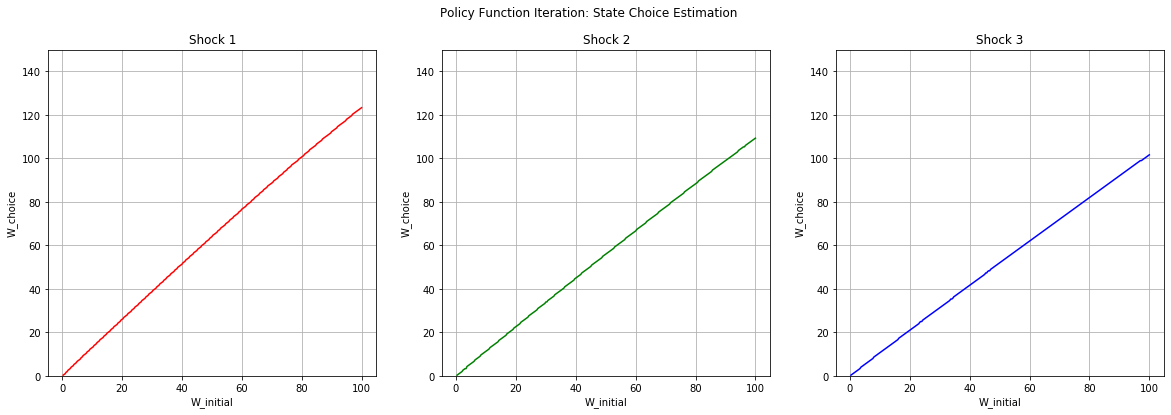

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));
plt.suptitle('Policy Function Iteration: State Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], W_prime[0,:][W <= 100], 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], W_prime[1,:][W <= 100], 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], W_prime[2,:][W <= 100], 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();


for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='W_choice')

plt.show();

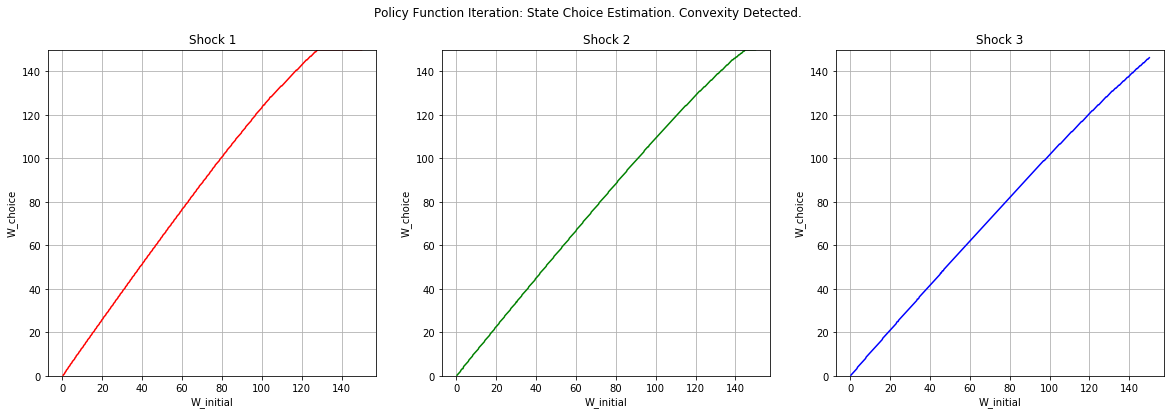

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));
plt.suptitle('Policy Function Iteration: State Choice Estimation. Convexity Detected.');

I = I.astype('int64')

axs[0].plot(W, W_prime[0,:], 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W, W_prime[1,:], 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W, W_prime[2,:], 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();


for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='W_choice')

plt.show();

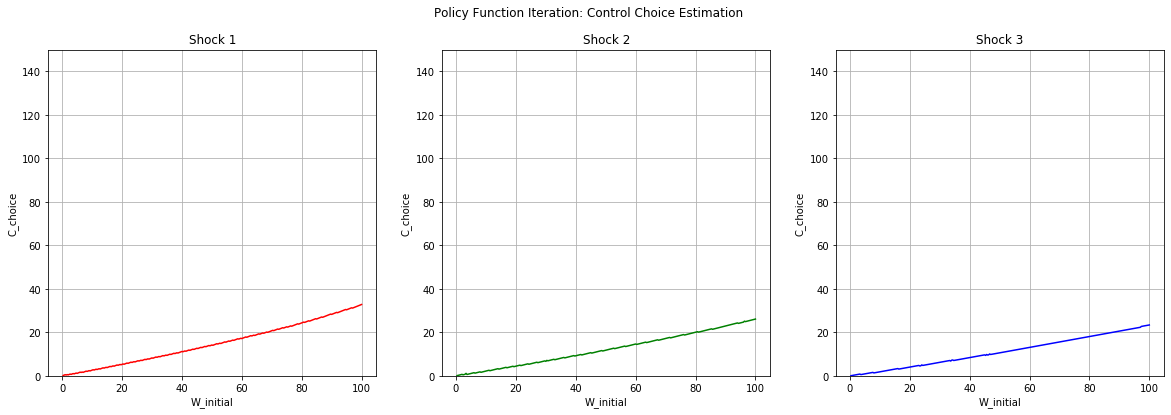

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(20,6));
plt.suptitle('Policy Function Iteration: Control Choice Estimation');

I = I.astype('int64')

axs[0].plot(W[W <= 100], y[0] * W[W <= 100] - W_prime[0,:][W <= 100] / R, 'r');
axs[0].set_title('Shock 1');
axs[0].set_ylim(0, W_start);
axs[0].grid();

axs[1].plot(W[W <= 100], y[1] * W[W <= 100] - W_prime[1,:][W <= 100] / R, 'g');
axs[1].set_title('Shock 2');
axs[1].set_ylim(0, W_start);
axs[1].grid();

axs[2].plot(W[W <= 100], y[2] * W[W <= 100] - W_prime[2,:][W <= 100] / R, 'b');
axs[2].set_title('Shock 3');
axs[2].set_ylim(0, W_start);
axs[2].grid();


for ax in axs.flat:
    ax.set(xlabel='W_initial', ylabel='C_choice')

plt.show();